In [1]:
from goobergrad import nn
from goobergrad import eval
from goobergrad.nn import Value
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


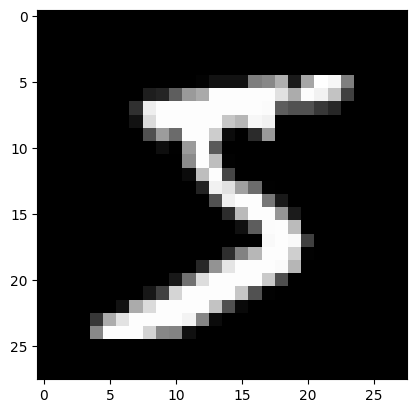

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
b = np.zeros((train_labels.size, train_labels.max()+1))
b[np.arange(train_labels.size), train_labels] = 1
train_labels = b

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# model definition

In [18]:
model = nn.MLP([784, 100, 100, 10])

ypred = model(train_images[0])
ypred = nn.softmax(ypred)


# training


In [9]:
import random

In [10]:
def random_batch(images, labels, batch_size):
    indexes = [random.randint(0, labels.shape[0]-1) for _ in range(batch_size)]
    for i in indexes:
        yield (images[i], labels[i])


In [ ]:
for image, label in random_batch(train_images, train_labels, 150):
    model.zero_grad()
            
    ypred = model(image)
    ypred = nn.softmax(ypred)
    loss = eval.CrossEntropy(ypred, label)
    before = loss.data
    
    loss.backward()
    model.step(.05)
    for y in ypred:
        print(y.grad)
    print(f'ypred{ypred}\n loss {loss}')
    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.914763691922277
0.0
ypred[Value(0.10536867786739859), Value(0.1154799595739565), Value(0.09125005760173785), Value(0.10252402120289451), Value(0.09967422849352243), Value(0.08834903028219684), Value(0.09664300151549479), Value(0.08980351992741219), Value(0.11217347251796549), Value(0.09873403101742079)]
 loss Value(2.187708744168759)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-9.717145826475871
0.0
0.0
ypred[Value(0.11017405644029009), Value(0.11907138156700663), Value(0.08541620923646463), Value(0.09367927778856061), Value(0.09900838913150578), Value(0.08913797979714985), Value(0.08871324670820643), Value(0.10291087710913474), Value(0.12558705217246965), Value(0.08630153004921165)]
 loss Value(2.2738919361004477)
0.0
0.0
-10.650601153832655
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ypred[Value(0.11038660867456339), Value(0.10653665063250142), Value(0.09389141378561028), Value(0.10031539614047998), Value(0.09500502010608741), Value(0.09015821965328293), Value(0.09408920626746055)